In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### 1. Consider a grain of pollen suspended in water, whose horizontal position can be modeled by Brownian motion $\{ B(t)\}$ with parameter $\alpha = 4 \text{mm}^2/\text{s}$, as in Example 49.1. Calculate the variance function of $\{ B(t) \}$.

- By Brownian motion definition, 
    - $B(t) - B(0) \sim \text{Normal}(\mu=0, \sigma=\sqrt{4 \cdot [t_1 - t_0]} ) $
    - $V(t) = Var[B(t)] = 4 \cdot (t_1 - t_0)$ 

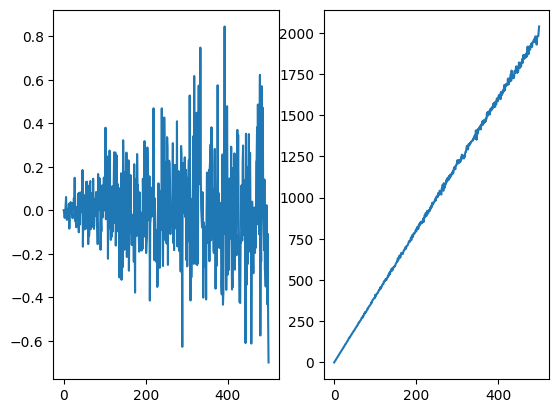

In [11]:
tvals=np.arange(0,500,1)
mu_x = np.array([np.mean(np.random.normal(0, np.sqrt(4*t), size=25_000)) for t in tvals])
var_x = np.array([np.var(np.random.normal(0, np.sqrt(4*t), size=25_000)) for t in tvals])

plt.subplot(121)
plt.plot(tvals, mu_x)
plt.subplot(122)
plt.plot(tvals, var_x)

### 2. Radioactive particles hit a Geiger counter according to a Poisson process at a rate of $\lambda = 0.8$ particles per second. Let $\{ N(t); t \ge 0 \}$ represent this Poisson process. Define the new process $\{ D(t); t \ge 3 \}$ by $$D(t) = N(t) - N(t-3)$$ This process represents the number of particles that hit the Geiger counter in the last 3 seconds. Calculate the variance function of $\{ D(t); t \ge 3 \}$

In [66]:
LAM = 1
tm3 = 5

ntm3 = np.random.poisson(lam=LAM*(tm3), size=10_000)
nt = ntm3 + np.random.poisson(lam=LAM*3, size=10_000)
print(np.var(ntm3), np.var(nt))
print(2 * tm3 + 3)

5.016750559999999 8.167640709999999
13


- For this poisson process, the arrivals for any time interval $t$ is distributed according to $\text{Poisson}(\lambda = 0.8)$ distribution
- Since non-overlapping time periods are independent in a Poisson process, the count of particles that hit the Geiger counter in the last 3 seconds $D(t) = N(t) - N(t-3)$ follows the same distribution across any 3 second period
    - $D(t) \sim \text{Poisson}(\lambda = 0.8 * 3 = 2.4)$

- $$\begin{align}
    Var[D(t)] &= Var[N(t) - N(t-3)] \\
    &= Var[N(t)] - Var[N(t-3)] \\
    &= \lambda t - \lambda (t-3) \\
    &= \lambda t - \lambda t + 3 \lambda \\
    &= 3 \lambda
    \end{align}$$

### 3. Consider the moving average process $\{ X[n]\}$ of example 48.2, defined by $$X[n] = 0.5 Z[n] + 0.5 Z[n-1]$$ where $\{ Z[n]\}$ is a sequence of i.i.d. standard normal random variables. Calculate the variance function of $\{ X[n] \}$

$$\begin{align}
    V(t) &= Var[X[n]] \\
    &= Var[0.5 Z[n] + 0.5 Z[n-1]] \\
    &= Var[0.5 Z[n]] + Var[0.5 Z[n-1]] \\
    &= 0.25 Var[Z[n]] + 0.25 Var[Z[n-1]] \\
    &= 2 * (0.25 \cdot 1 ) \\
    &= 0.5
\end{align}$$

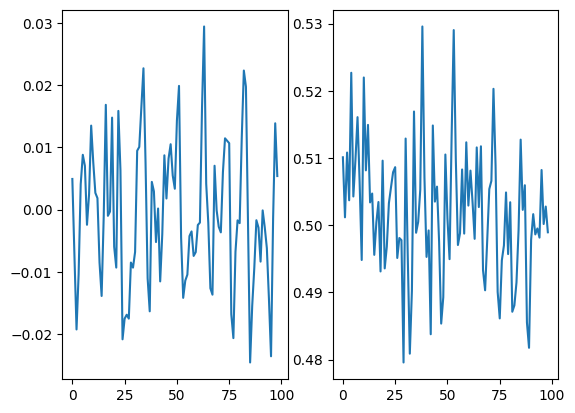

In [28]:
instantiations = np.array([np.convolve(np.repeat(0.5,2), np.random.normal(0,1,size=100), 'valid') for _ in range(5000)])
plt.subplot(121)
plt.plot(np.arange(0,len(instantiations[0]),1), np.mean(instantiations, axis=0))
plt.subplot(122)
plt.plot(np.arange(0,len(instantiations[0]),1), np.var(instantiations, axis=0))

### 4. Let $\Theta$ be a $\text{Uniform}(a= -\pi, b = \pi)$ random variables, and let $f$ be a constant. Define the random phase process $\{ X(t) \}$ by $$ X(t) = \cos(2 \pi f t + \Theta) $$ Calculate the variance function of $\{ X(t) \}$. (Hint: Use LOTUS)

- In section 50 exercise 4, we spoke about how the expectation is 0 across every point, but the stochastic process maintains a sinusoidal shape.
- We will show why in this exercise

(1000, 40) (40,)


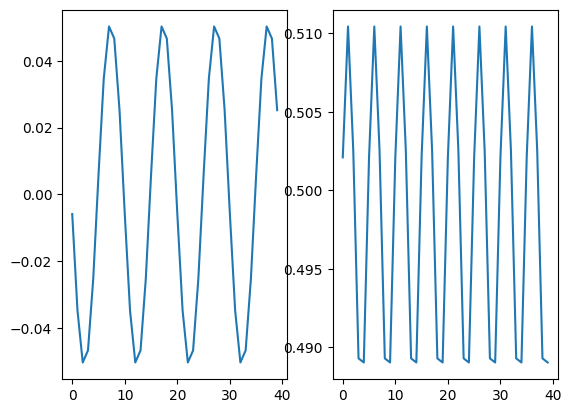

In [248]:
# THETA = np.arange(-np.pi, np.pi, 0.5)
THETA = np.random.uniform(-np.pi, np.pi, size=10_00)
tvals = np.arange(-2,2,0.1)

instantiations = np.array([np.cos((2 * np.pi * tvals) + theta) for theta in THETA])

print(instantiations.shape, np.mean(instantiations, axis=0).shape)

plt.subplot(121)
plt.plot(np.arange(0, len(instantiations[0])), np.mean(instantiations, axis=0))

plt.subplot(122)
plt.plot(np.arange(0, len(instantiations[0])), np.var(instantiations, axis=0))

$$\begin{align}
    Var[X(t)] &= Var[\cos (2\pi f t + \Theta)] \\
    &= E[\cos (2\pi f t + \Theta)^2] - E[\cos (2\pi f t + \Theta)]^2 \\
    &= E[\cos (2\pi f t + \Theta)^2] & \text{From exercise 50 Q4 } E[\cos (2\pi f t + \Theta)] = 0 \\
    &= \int_{-\pi}^{\pi} \cos (2\pi f t + \Theta)^2 \cdot \frac{1}{2\pi} d \Theta & \text{by LOTUS} \\
    &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \cos^2(2\pi f t + \Theta) d \Theta \\
    &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \frac{\cos (4\pi f t + 2\Theta) + 1}{2} d \Theta & \text{by } \cos(2x) = 2 \cos^2(x) - 1 \\
    &= \frac{1}{4\pi} \int_{-\pi}^{\pi} \cos (4\pi f t + 2\Theta) + 1 d \Theta \\
    &= \frac{1}{4\pi} [\sin (4\pi f t + 2\Theta) \cdot \frac{1}{2} + \Theta]^{\pi}_{-\pi} \\
    &= \frac{1}{4\pi} [\sin (4\pi f t + 2\pi) \cdot \frac{1}{2} + \pi - (\sin (4\pi f t - 2\pi) \cdot \frac{1}{2} - \pi)] \\
    &= \frac{1}{4\pi} [\sin (4\pi f t + 2\pi) \cdot \frac{1}{2} + \pi - \sin (4\pi f t - 2\pi) \cdot \frac{1}{2} + \pi] \\
    &= \frac{1}{4\pi} [\frac{\sin (4\pi f t + 2\pi)}{2} - \frac{\sin (4\pi f t - 2\pi)}{2} + 2\pi] \\
    &= \frac{2\pi}{4\pi} \\
    &= \frac{1}{2}
\end{align}$$
